In [2]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the train datset
df_ = pd.read_csv("baseball.csv")
#df=df.dropna()
df=df_
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Checking out the feature names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
#Checking out the 
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


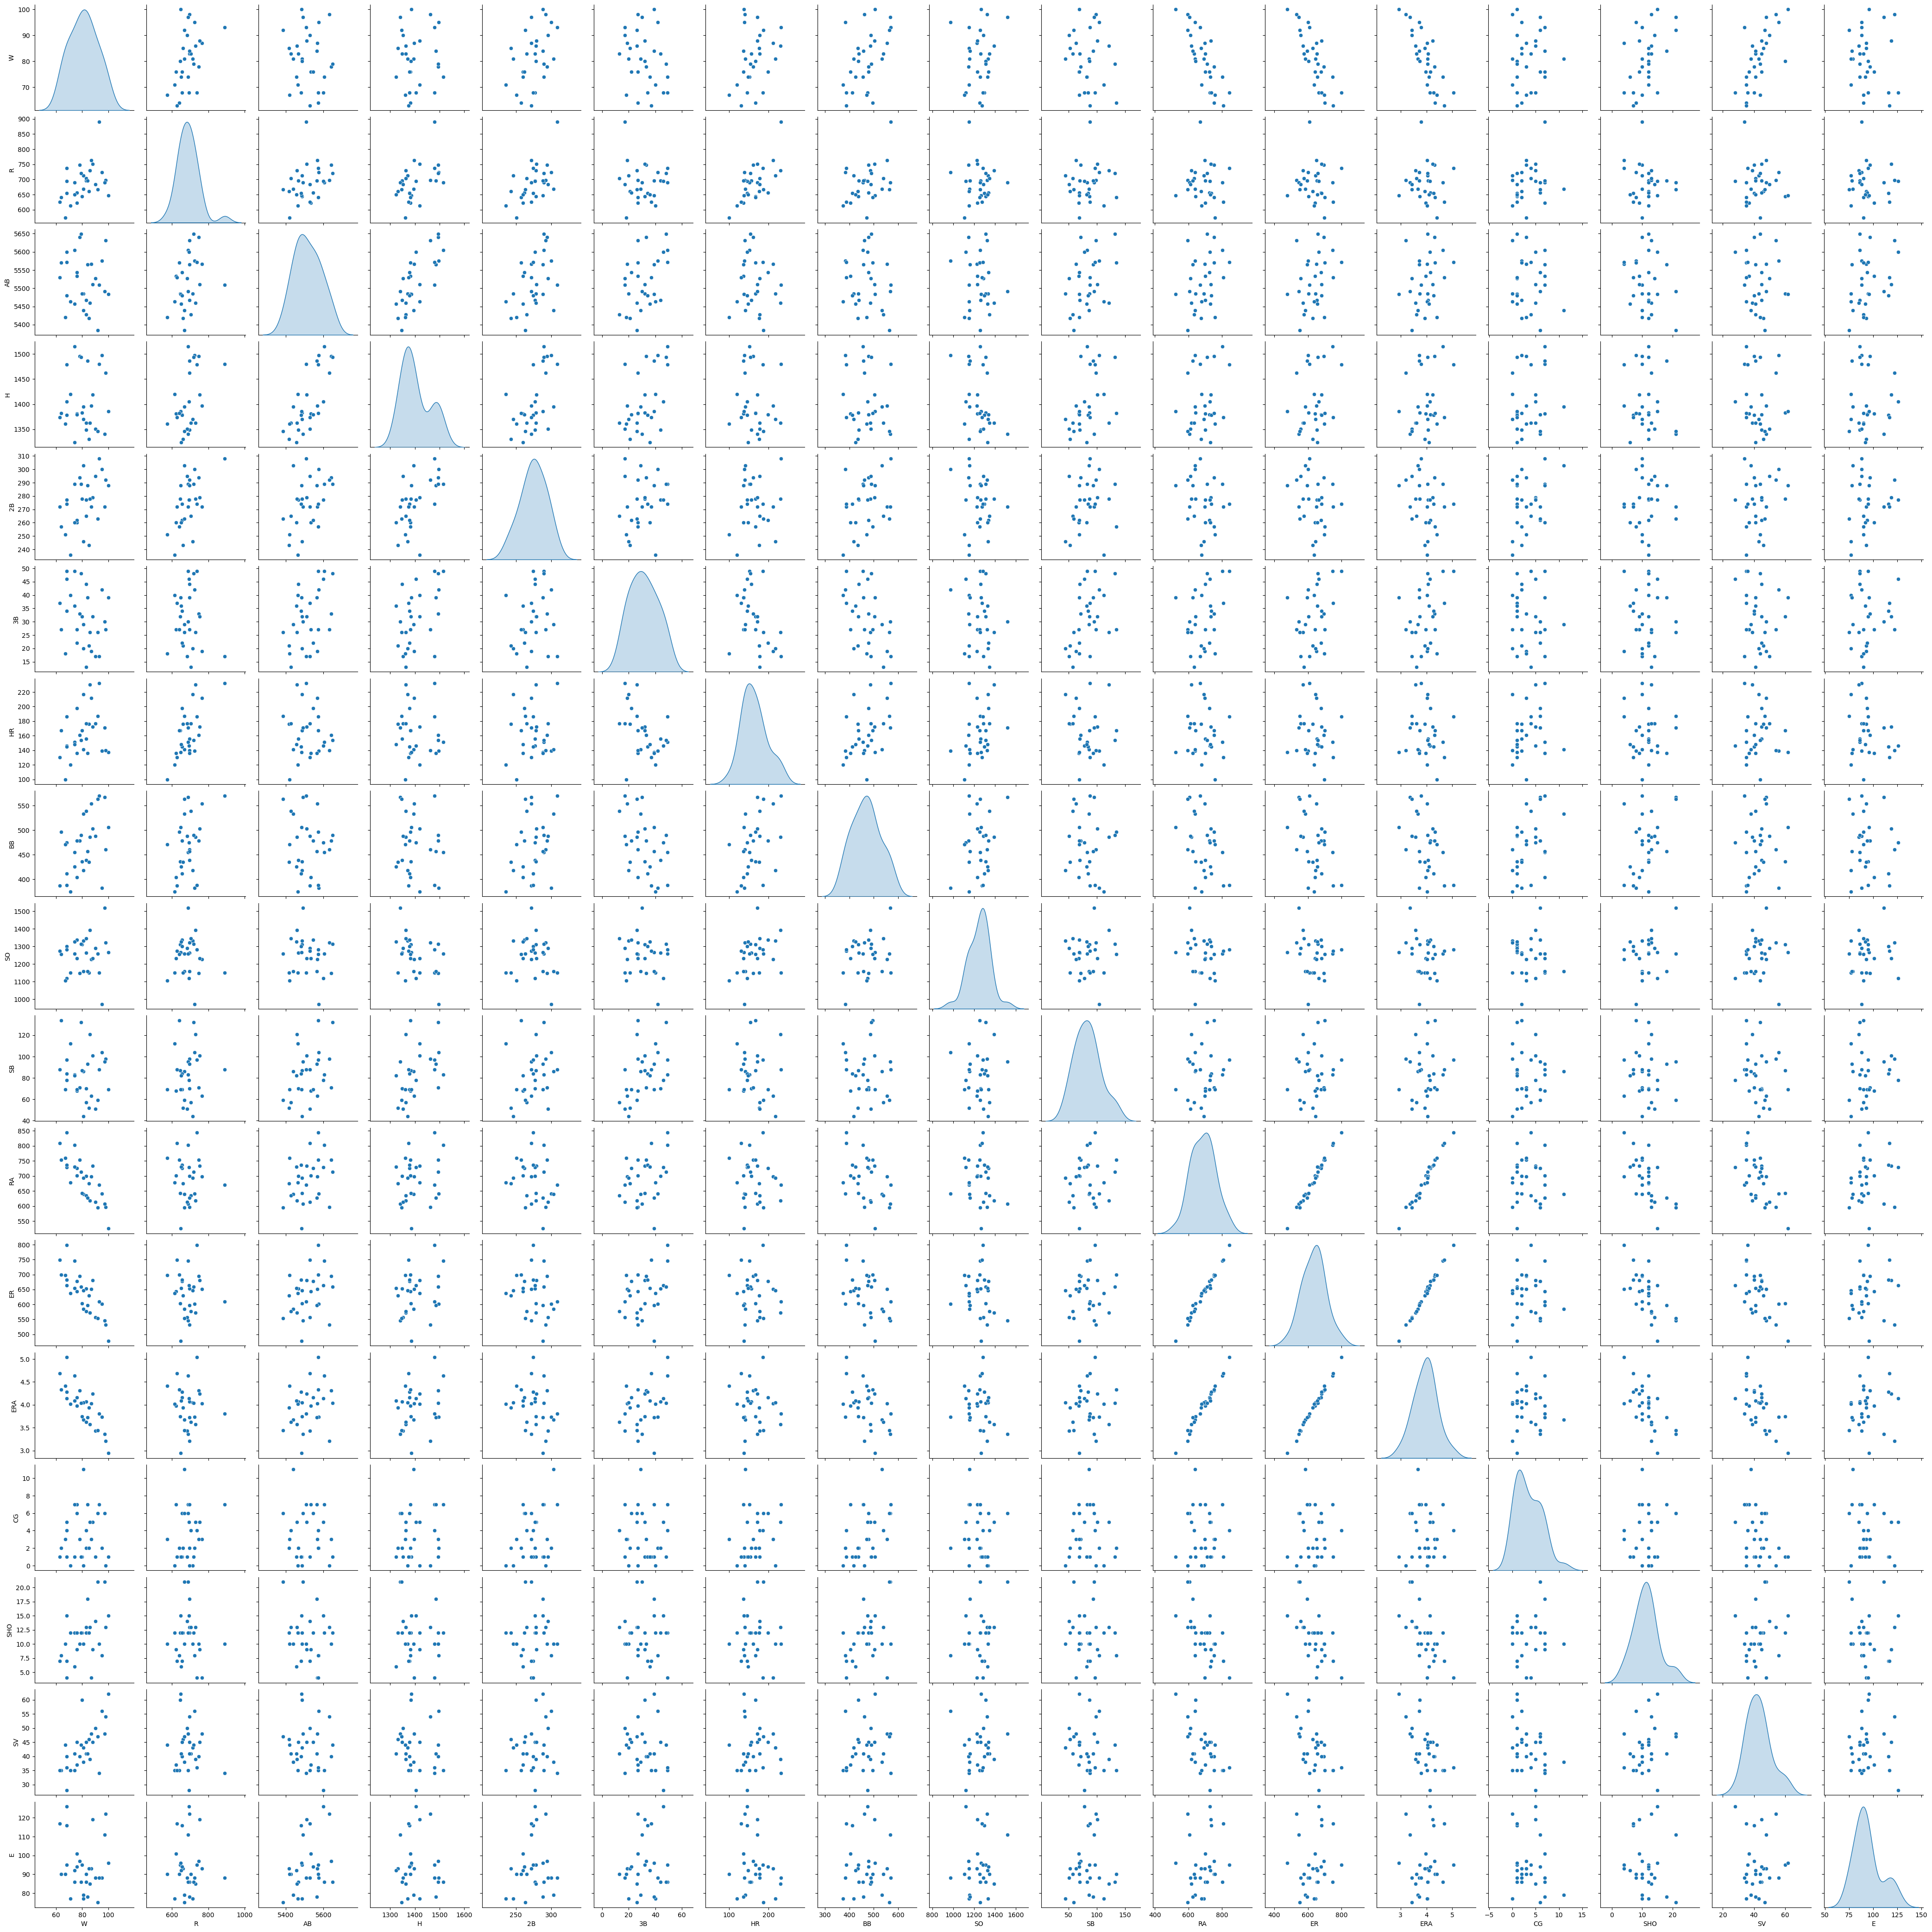

In [6]:
#creating scatterplots between various features to understand relasionship between them
sns.pairplot(df,diag_kind="kde")

<Axes: >

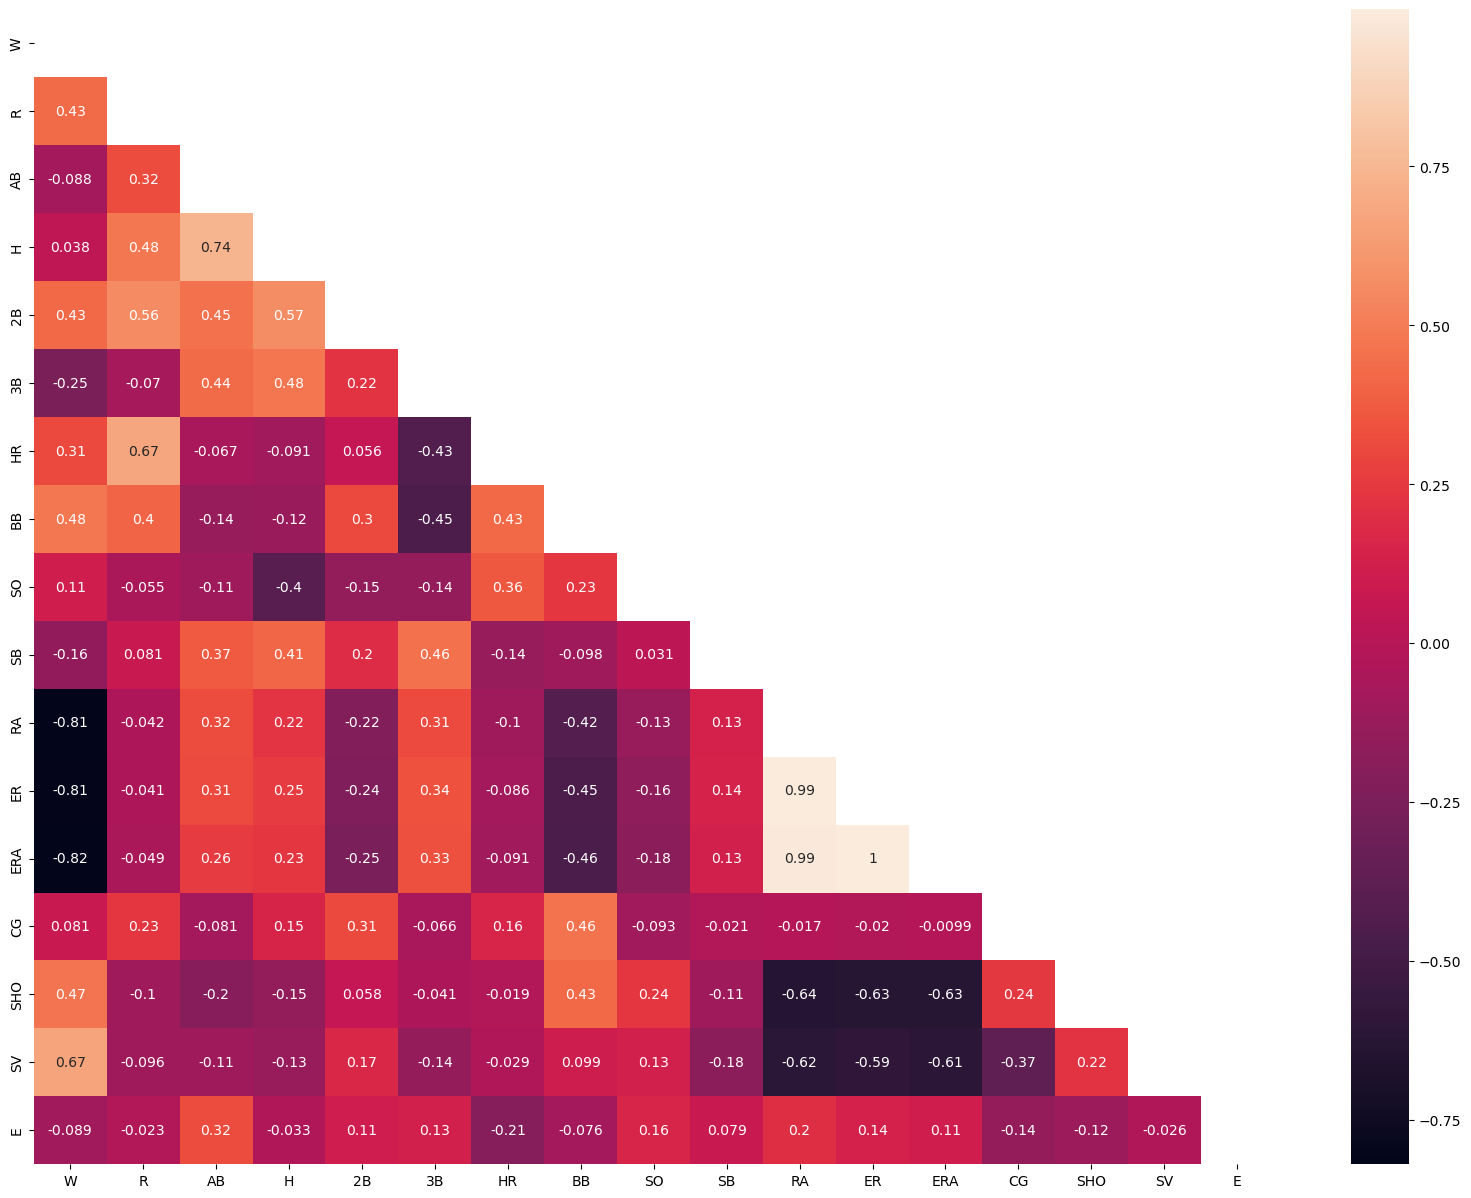

In [7]:
#correlation matrix
plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [8]:
#Split the data to y and x with x is without the class's.
Y = df[['W']]
X=df[['RA', 'ER', 'SV', 'SHO']]
#X = df.drop(['W'], axis=1)

In [9]:
#Splitting the train and test data and scaling respectively
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=2)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
#creating linear regression as a baseline model
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
print('Training Score:', score)
score = model.score(X_test, Y_test)
print('Testing Score:', score)

Training Score: 0.7085898578272412
Testing Score: 0.5599992825843974


In [12]:
#Finding out the mean absolute error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = np.round(mean_absolute_error(Y_test,Y_pred),3)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 6.23


In [13]:
#Finding out the mean Squarred Error
mse = np.round(mean_squared_error(Y_test,Y_pred),3)
print('Mean Squared Error:', mse)

Mean Squared Error: 46.457


In [14]:
#Finding out the R2 Score
score = np.round(r2_score(Y_test,Y_pred),3)
print('R2 Score:', score)

R2 Score: 0.56
